In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)


In [13]:
# create firingrate and uniquerate function

def firingRate(df):
    return 1-df.isna().sum(axis=0)/df.shape[0]

def uniqueCount(df):
    return df.nunique()

def uniqueRate(df):
    return df.nunique()/df.shape[0]

def firingRateDetailed(df):
    output = []
    firingRate = 1-df.isna().sum(axis=0)/df.shape[0]
    uniqueCount = df.nunique()
    uniqueRate = df.nunique()/df.shape[0]
    for i in df.columns:
        if df[i].dtype == 'O':
            if df[i].nunique() <= 15:
                output.append(df[i].value_counts(dropna = False, normalize = True))
            else:
                output.append((i+': Categorical Column with '+ str(df[i].nunique()) + ' groups'))
        elif (df[i].dtype in ['int8','int16','int32','float32','float64']):
            output.append(df[i].describe())
    final = pd.DataFrame({'Column': df.columns,
                          'firingRate': firingRate,
                          'uniqueCount': uniqueCount,
                          'uniqueRate': uniqueRate,
                   'Detailed_Summary': output})
    return(final)
        

## Analyze 2021 Sample

In [114]:
sample_2021 = pd.read_csv('/Users/luis/Documents/FannieMae_DataAssessment/Sample/sample_2008/sample_orig_2008.txt', delimiter = '|', header=None)
sample_2021_historical = pd.read_csv('/Users/luis/Documents/FannieMae_DataAssessment/Sample/sample_2008/sample_svcg_2008.txt', delimiter = '|', header=None)
(sample_2021.shape, sample_2021_historical.shape)

/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_1060/4004098572.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_2021 = pd.read_csv('/Users/luis/Documents/Chase_DataStudy/Sample/sample_2008/sample_orig_2008.txt', delimiter = '|', header=None)
/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_1060/4004098572.py:2: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_2021_historical = pd.read_csv('/Users/luis/Documents/Chase_DataStudy/Sample/sample_2008/sample_svcg_2008.txt', delimiter = '|', header=None)


((50000, 31), (2400501, 32))

In [115]:
sample_2021.columns = ["CreditScore", "FirstPaymentDate",
                  "FirstTimeHomebuyerFlag", "MaturityDate", 
                  "MSA", "MortgageInsurancePerc", 
                  "NumberOfUnits", "OccupancyStatus",
                  "OrigCLTV", "OrigDTI", "OrigUPB", 
                  "OrigLTV", "OrigInterestRate", "Channel",
                  "PPM_Flag", "AmortizationType", "PropertyState", 
                  "PropertyType", "PostalCode","LoanSeqNumber", 
                  "LoanPurpose", "OrigLoanTerms", "NumBorrowers", 
                  "SellerName", "ServicerName", "SuperConformingFlag",
                  "PreHarpLoanSeqNum", "ProgramIndicator", "HarpIndicator", 
                  "PropertyValuationMethod", "InterestOnlyIndicator"]

sample_2021_historical.columns = ["LoanSeqNumber", "MonthlyReportingPeriod", "CurrentActualUPB", 
                  "CurrentLoanDelinquincyStatus", "LoanAge", "RemainingMonthsToMaturity", 
                  "DefectSettlementDate", "ModificationFlag", "ZeroBalanceCode", 
                  "ZeroBalanceEffectiveDate", "CurrentInterestRate", "CurrentDeferredUPB", 
                  "DDLPI", "MI_Recoveries", "NetSaleProceeds", "NonMI_Recoveries", 
                  "Expenses", "LegalCosts", "MaintenanceAndPreservationCosts",
                  "TaxesAndInsurance", "MiscExpenses", "ActualLossCalculation", 
                  "ModificationCost", "StepModificationFlag", "DeferredPaymentPlan", 
                  "EstimatedLTV", "ZeroBalanceRemovalUPB", "DelinquentAccruedInterest", 
                  "DelinquencyDueToDisaster", "BorrowerAssistanceStatusCode", 
                  "CurrentMonthModCost", "InterestBearingUPB"]




In [116]:
sample_2021_historical.CurrentLoanDelinquincyStatus.value_counts()

0      2238202
1        54186
2        19413
RA       10482
3         9760
        ...   
134          1
135          1
136          1
137          1
158          1
Name: CurrentLoanDelinquincyStatus, Length: 160, dtype: int64

In [5]:
sample_2021.sample(10)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyerFlag,MaturityDate,MSA,MortgageInsurancePerc,NumberOfUnits,OccupancyStatus,OrigCLTV,OrigDTI,...,OrigLoanTerms,NumBorrowers,SellerName,ServicerName,SuperConformingFlag,PreHarpLoanSeqNum,ProgramIndicator,HarpIndicator,PropertyValuationMethod,InterestOnlyIndicator
32073,782,202110,N,204109,35084.0,0,1,P,65,38,...,240,2,NEWREZ LLC,NEW RESIDENTIAL MORTGAGE LLC,NaN,NaN,9,NaN,1,N
14108,627,202106,N,205105,47664.0,0,1,P,64,39,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
32340,730,202111,N,205110,40140.0,0,1,P,67,42,...,360,1,Other sellers,FREEDOM MORTGAGE CORPORATION,NaN,NaN,9,NaN,1,N
49211,811,202202,N,203701,44140.0,0,1,P,58,38,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
30625,781,202110,N,203609,23420.0,0,1,I,51,50,...,180,1,"UNITED WHOLESALE MORTGAGE, LLC","UNITED WHOLESALE MORTGAGE, LLC",NaN,NaN,9,NaN,2,N
46617,792,202112,Y,205111,16984.0,25,1,P,95,47,...,360,1,Other sellers,Other servicers,NaN,NaN,H,NaN,2,N
41342,797,202112,N,205111,36740.0,0,1,S,80,50,...,360,1,"CALIBER HOME LOANS, INC.","CALIBER HOME LOANS, INC.",NaN,NaN,9,NaN,1,N
49545,725,202202,N,205201,36740.0,0,1,P,46,39,...,360,2,"CITIZENS BANK, NA","CITIZENS BANK, NA",NaN,NaN,9,NaN,2,N
23148,778,202108,N,203607,42540.0,0,1,P,64,20,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
3128,771,202103,N,203602,29460.0,0,1,P,65,47,...,180,1,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,NaN,NaN,9,NaN,1,N


In [7]:
sample_2021_historical.sample(10)

,LoanSeqNumber,MonthlyReportingPeriod,CurrentActualUPB,CurrentLoanDelinquincyStatus,LoanAge,RemainingMonthsToMaturity,DefectSettlementDate,ModificationFlag,ZeroBalanceCode,ZeroBalanceEffectiveDate,...,ModificationCost,StepModificationFlag,DeferredPaymentPlan,EstimatedLTV,ZeroBalanceRemovalUPB,DelinquentAccruedInterest,DelinquencyDueToDisaster,BorrowerAssistanceStatusCode,CurrentMonthModCost,InterestBearingUPB
329686,F21Q20504562,202204,182720.38,0,9,171,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,182720.38
597374,F21Q40133391,202206,530252.69,0,7,353,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,530252.69
523129,F21Q30672615,202201,164000.00,0,3,297,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,999,NaN,NaN,NaN,NaN,NaN,164000.00
479761,F21Q30388028,202202,278000.00,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,88,NaN,NaN,NaN,NaN,NaN,278000.00
298304,F21Q20354741,202107,524000.00,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,524000.00
206733,F21Q12386096,202106,88000.00,0,2,178,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,88000.00
359571,F21Q20658150,202109,79000.00,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,999,NaN,NaN,NaN,NaN,NaN,79000.00
140435,F21Q12018997,202104,317000.00,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN,NaN,317000.00
59349,F21Q11586979,202111,163985.35,0,8,352,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,163985.35
325141,F21Q20483787,202203,255114.54,0,9,351,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN,255114.54


In [54]:
join = sample_2021_historical.merge(sample_2021, on = 'LoanSeqNumber', how = 'left')
(join.shape)

(699854, 62)

In [10]:
join.CurrentLoanDelinquincyStatus.value_counts()

0     695618
1       2980
2        417
3        220
4        149
5        126
6         92
7         75
8         54
9         43
10        31
11        23
12        14
13         6
14         2
15         2
16         2
Name: CurrentLoanDelinquincyStatus, dtype: int64

## Create Delinquent Flag based on LoanDelinquencyStatus

In [55]:
join['Delinquent_Flag'] = ['Delinquent' if i > 0 else "Good_Standing" for i in join.CurrentLoanDelinquincyStatus]
join.Delinquent_Flag.value_counts()

Good_Standing    695618
Delinquent         4236
Name: Delinquent_Flag, dtype: int64

In [24]:
agg_historical_by_loanseq = join.groupby("LoanSeqNumber").CurrentLoanDelinquincyStatus.max()
(agg_historical_by_loanseq.value_counts(),agg_historical_by_loanseq.value_counts(normalize = True))

(0     47889
 1      1757
 2       145
 3        68
 4        25
 5        25
 7        19
 6        18
 9        12
 8        10
 11        9
 10        8
 12        8
 13        4
 16        2
 Name: CurrentLoanDelinquincyStatus, dtype: int64,
 0     0.957799
 1     0.035141
 2     0.002900
 3     0.001360
 4     0.000500
 5     0.000500
 7     0.000380
 6     0.000360
 9     0.000240
 8     0.000200
 11    0.000180
 10    0.000160
 12    0.000160
 13    0.000080
 16    0.000040
 Name: CurrentLoanDelinquincyStatus, dtype: float64)

In [20]:
agg_historical_by_loanseq_flag = join.groupby("LoanSeqNumber").Delinquent_Flag.min()
agg_historical_by_loanseq_flag.value_counts()

Good_Standing    47889
Delinquent        2110
Name: Delinquent_Flag, dtype: int64

In [29]:
analyze = sample_2021.merge(agg_historical_by_loanseq, how = 'inner', on = 'LoanSeqNumber')
analyze = analyze.merge(agg_historical_by_loanseq_flag, how = 'inner', on = 'LoanSeqNumber')
analyze.shape

(49999, 33)

In [39]:
pd.crosstab(analyze.PropertyState.fillna("NA"), analyze.Delinquent_Flag.fillna("NA"), dropna = False)


Delinquent_Flag,Delinquent,Good_Standing
PropertyState,,
AK,5,80
AL,21,545
AR,15,292
AZ,82,1815
CA,324,6082
CO,68,1369
CT,30,548
DC,4,84
DE,7,202


In [38]:
pd.crosstab(analyze.PropertyState.fillna("NA"), analyze.Delinquent_Flag.fillna("NA"), dropna = False).apply(lambda r: r/r.sum(), axis=1)



Delinquent_Flag,Delinquent,Good_Standing
PropertyState,,
AK,0.058824,0.941176
AL,0.037102,0.962898
AR,0.048860,0.951140
AZ,0.043226,0.956774
CA,0.050578,0.949422
CO,0.047321,0.952679
CT,0.051903,0.948097
DC,0.045455,0.954545
DE,0.033493,0.966507


In [30]:
analyze.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyerFlag',
       'MaturityDate', 'MSA', 'MortgageInsurancePerc', 'NumberOfUnits',
       'OccupancyStatus', 'OrigCLTV', 'OrigDTI', 'OrigUPB', 'OrigLTV',
       'OrigInterestRate', 'Channel', 'PPM_Flag', 'AmortizationType',
       'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNumber',
       'LoanPurpose', 'OrigLoanTerms', 'NumBorrowers', 'SellerName',
       'ServicerName', 'SuperConformingFlag', 'PreHarpLoanSeqNum',
       'ProgramIndicator', 'HarpIndicator', 'PropertyValuationMethod',
       'InterestOnlyIndicator', 'CurrentLoanDelinquincyStatus',
       'Delinquent_Flag'],
      dtype='object')

## Do it for all Sample Data Years (1999 - 2022)

In [ ]:


sample_2021 = pd.read_csv('/Users/luis/Documents/FannieMae_DataAssessment/Sample/sample_2021/sample_orig_2021.txt', delimiter = '|', header=None)
sample_2021_historical = pd.read_csv('/Users/luis/Documents/FannieMae_DataAssessment/Sample/sample_2021/sample_svcg_2021.txt', delimiter = '|', header=None)
(sample_2021.shape, sample_2021_historical.shape)

In [170]:
sample_columns = ["CreditScore", "FirstPaymentDate",
                  "FirstTimeHomebuyerFlag", "MaturityDate", 
                  "MSA", "MortgageInsurancePerc", 
                  "NumberOfUnits", "OccupancyStatus",
                  "OrigCLTV", "OrigDTI", "OrigUPB", 
                  "OrigLTV", "OrigInterestRate", "Channel",
                  "PPM_Flag", "AmortizationType", "PropertyState", 
                  "PropertyType", "PostalCode","LoanSeqNumber", 
                  "LoanPurpose", "OrigLoanTerms", "NumBorrowers", 
                  "SellerName", "ServicerName", "SuperConformingFlag",
                  "PreHarpLoanSeqNum", "ProgramIndicator", "HarpIndicator", 
                  "PropertyValuationMethod", "InterestOnlyIndicator"]

sample_historical_columns = ["LoanSeqNumber", "MonthlyReportingPeriod", "CurrentActualUPB", 
                  "CurrentLoanDelinquincyStatus", "LoanAge", "RemainingMonthsToMaturity", 
                  "DefectSettlementDate", "ModificationFlag", "ZeroBalanceCode", 
                  "ZeroBalanceEffectiveDate", "CurrentInterestRate", "CurrentDeferredUPB", 
                  "DDLPI", "MI_Recoveries", "NetSaleProceeds", "NonMI_Recoveries", 
                  "Expenses", "LegalCosts", "MaintenanceAndPreservationCosts",
                  "TaxesAndInsurance", "MiscExpenses", "ActualLossCalculation", 
                  "ModificationCost", "StepModificationFlag", "DeferredPaymentPlan", 
                  "EstimatedLTV", "ZeroBalanceRemovalUPB", "DelinquentAccruedInterest", 
                  "DelinquencyDueToDisaster", "BorrowerAssistanceStatusCode", 
                  "CurrentMonthModCost", "InterestBearingUPB"]



for i in range(1999, 2023):
    sample_orig = pd.read_csv("/Users/luis/Documents/FannieMae_DataAssessment/Sample/sample_"+
                              str(i)+"/sample_orig_"+str(i)+".txt", delimiter = '|', header=None)
    sample_perf = pd.read_csv("/Users/luis/Documents/FannieMae_DataAssessment/Sample/sample_"+
                              str(i)+"/sample_svcg_"+str(i)+".txt", delimiter = '|', header=None)
    sample_orig.columns = sample_columns
    sample_perf.columns = sample_historical_columns
    join = sample_orig.merge(sample_perf, on = 'LoanSeqNumber', how = 'left')
    join['CurrentLoanDelinquincyStatus_fix'] = [j if j not in ['XX','RA'] else np.nan for j in join.CurrentLoanDelinquincyStatus]
    join['CurrentLoanDelinquincyStatus_fix'] = pd.to_numeric(join['CurrentLoanDelinquincyStatus_fix'])
    join['Delinquent_Flag'] = ['Delinquent' if k > 0 else "Good_Standing" for k in join.CurrentLoanDelinquincyStatus_fix]
    agg_historical_by_loanseq = join.groupby("LoanSeqNumber").CurrentLoanDelinquincyStatus_fix.max()
    agg_historical_by_loanseq_flag = join.groupby("LoanSeqNumber").Delinquent_Flag.min()
    output = sample_orig.merge(agg_historical_by_loanseq, how = 'inner', 
                               on = 'LoanSeqNumber').merge(agg_historical_by_loanseq_flag, 
                                                           how = 'inner', on = 'LoanSeqNumber')
    output['year'] = i
    output.to_parquet("/Users/luis/Documents/FannieMae_DataAssessment/Sample_Parquets/sample_"+str(i)+".parquet")
    #output.to_csv("/Users/luis/Documents/FannieMae_DataAssessment/Sample_Parquets/sample_"+str(i)+".csv")

    

/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_1060/4199167536.py:29: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_orig = pd.read_csv("/Users/luis/Documents/Chase_DataStudy/Sample/sample_"+str(i)+"/sample_orig_"+str(i)+".txt", delimiter = '|', header=None)
/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_1060/4199167536.py:30: DtypeWarning: Columns (3,7,23) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_perf = pd.read_csv("/Users/luis/Documents/Chase_DataStudy/Sample/sample_"+str(i)+"/sample_svcg_"+str(i)+".txt", delimiter = '|', header=None)
/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_1060/4199167536.py:30: DtypeWarning: Columns (7,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_perf = pd.read_csv("/Users/luis/Documents/Chase_DataStudy/Sample/sample_"+str(i)+"/sample_svcg_"+str(i)+".txt", delimiter = '|',

## Read Newly Processed Parquet Files

In [171]:
overall = pd.DataFrame()
for i in range(1999,2018):
    data_parquet = pd.read_parquet("/Users/luis/Documents/FannieMae_DataAssessment/Sample_Parquets/sample_"+str(i)+".parquet")
    overall = pd.concat([overall, data_parquet])
    
## Weird Parsing error for file 18(?)
data_parquet = pd.read_csv("/Users/luis/Documents/FannieMae_DataAssessment/Sample_Parquets/sample_2018.csv")
overall = pd.concat([overall, data_parquet])

for i in range(2019,2023):
    data_parquet = pd.read_parquet("/Users/luis/Documents/FannieMae_DataAssessment/Sample_Parquets/sample_"+str(i)+".parquet")
    overall = pd.concat([overall, data_parquet])
    
overall.shape


/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_1060/739169068.py:7: DtypeWarning: Columns (4,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_parquet = pd.read_csv("/Users/luis/Documents/Chase_DataStudy/Sample_Parquets/sample_2018.csv")


(1175000, 35)

In [173]:
sample_perf.CurrentLoanDelinquincyStatus.value_counts()

0    134602
1       675
2        67
3        25
4        13
5         7
6         1
Name: CurrentLoanDelinquincyStatus, dtype: int64

In [172]:
overall.year.value_counts().sort_index()

1999    50000
2000    50000
2001    50000
2002    50000
2003    50000
2004    50000
2005    50000
2006    50000
2007    50000
2008    50000
2009    50000
2010    50000
2011    50000
2012    50000
2013    50000
2014    50000
2015    50000
2016    50000
2017    50000
2018    50000
2019    50000
2020    50000
2021    50000
2022    25000
Name: year, dtype: int64

In [174]:
overall.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyerFlag',
       'MaturityDate', 'MSA', 'MortgageInsurancePerc', 'NumberOfUnits',
       'OccupancyStatus', 'OrigCLTV', 'OrigDTI', 'OrigUPB', 'OrigLTV',
       'OrigInterestRate', 'Channel', 'PPM_Flag', 'AmortizationType',
       'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNumber',
       'LoanPurpose', 'OrigLoanTerms', 'NumBorrowers', 'SellerName',
       'ServicerName', 'SuperConformingFlag', 'PreHarpLoanSeqNum',
       'ProgramIndicator', 'HarpIndicator', 'PropertyValuationMethod',
       'InterestOnlyIndicator', 'CurrentLoanDelinquincyStatus_fix',
       'Delinquent_Flag', 'year', 'Unnamed: 0'],
      dtype='object')

In [178]:
pd.crosstab(overall.year.fillna("NA"), overall.Delinquent_Flag.fillna("NA"))

Delinquent_Flag,Delinquent,Good_Standing
year,,
1999,8375,41625
2000,6822,43178
2001,6631,43369
2002,6232,43768
2003,7347,42653
2004,9523,40477
2005,11618,38382
2006,12539,37461
2007,13514,36486


In [175]:
pd.crosstab(overall.year.fillna("NA"), overall.Delinquent_Flag.fillna("NA")).apply(lambda r: r/r.sum(), axis = 1)

Delinquent_Flag,Delinquent,Good_Standing
year,,
1999,0.16750,0.83250
2000,0.13644,0.86356
2001,0.13262,0.86738
2002,0.12464,0.87536
2003,0.14694,0.85306
2004,0.19046,0.80954
2005,0.23236,0.76764
2006,0.25078,0.74922
2007,0.27028,0.72972


In [190]:
plot_data = pd.DataFrame(pd.crosstab(overall.year.fillna("NA"), overall.Delinquent_Flag.fillna("NA")).apply(lambda r: r/r.sum(), axis = 1))

In [187]:
plot_data.columns

Index(['Delinquent', 'Good_Standing'], dtype='object', name='Delinquent_Flag')

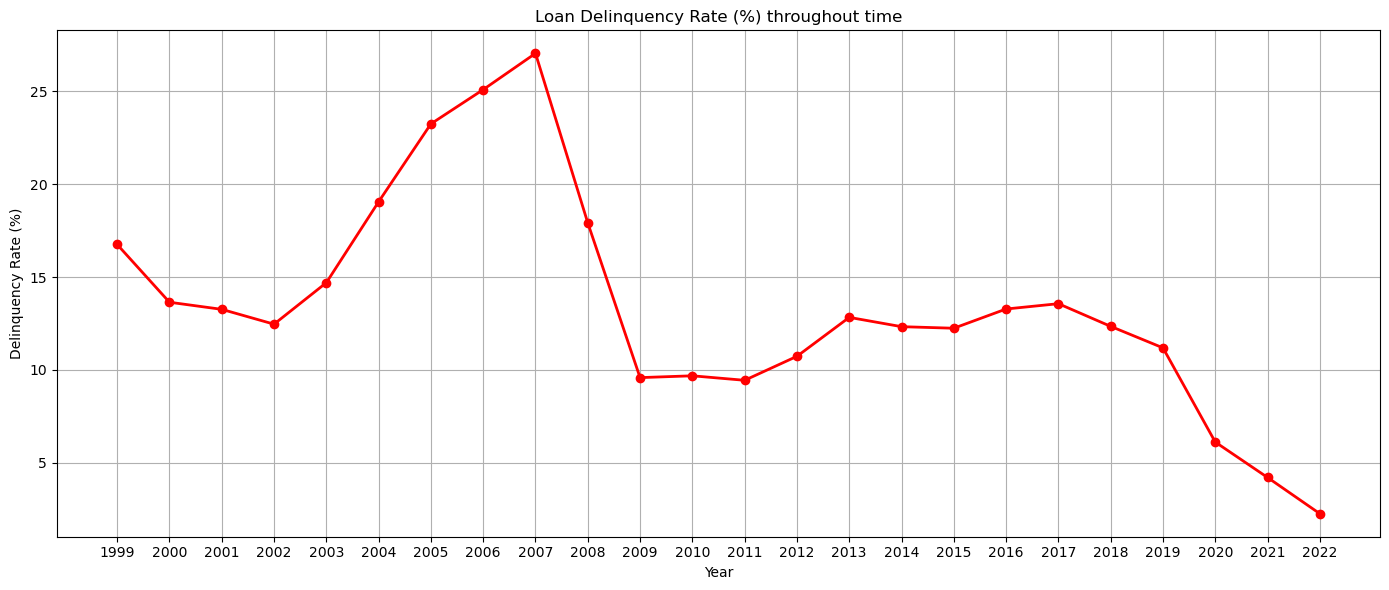

In [191]:
plot_data = plot_data[['Delinquent']]
plot_data['Delinquent'] = plot_data['Delinquent'] * 100
plt.figure(figsize=(14,6), tight_layout=True)
#plotting
plt.plot(plot_data, 'o-', linewidth=2, color = 'red')
plt.grid()

#customization
plt.xticks(sorted(plot_data.index))
plt.xlabel('Year')
plt.ylabel('Delinquency Rate (%)')
plt.title('Loan Delinquency Rate (%) throughout time')
plt.show()

In [177]:
pd.crosstab(overall.PropertyState.fillna("NA"), overall.Delinquent_Flag.fillna("NA")).apply(lambda r: r/r.sum(), axis = 1)

Delinquent_Flag,Delinquent,Good_Standing
PropertyState,,
AK,0.118155,0.881845
AL,0.167959,0.832041
AR,0.136933,0.863067
AZ,0.140112,0.859888
CA,0.122130,0.877870
CO,0.103372,0.896628
CT,0.148971,0.851029
DC,0.129946,0.870054
DE,0.136085,0.863915


In [176]:
pd.crosstab(overall.year, overall.CurrentLoanDelinquincyStatus_fix).apply(lambda r: r/r.sum(), axis = 1)

CurrentLoanDelinquincyStatus_fix,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,131.0,132.0,133.0,136.0,145.0,154.0,155.0,158.0,159.0,160.0
year,,,,,,,,,,,,,,,,,,,,,
1999,0.832490,0.100366,0.032422,0.008180,0.00414,0.00360,0.00290,0.00202,0.00204,0.00164,...,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2000,0.863560,0.070600,0.031340,0.008460,0.00406,0.00336,0.00262,0.00222,0.00206,0.00162,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2001,0.867380,0.076420,0.025380,0.006500,0.00396,0.00274,0.00238,0.00230,0.00156,0.00154,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2002,0.875358,0.069481,0.022160,0.005440,0.00336,0.00334,0.00244,0.00236,0.00220,0.00124,...,0.00000,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2003,0.853045,0.087009,0.019282,0.006861,0.00442,0.00358,0.00312,0.00248,0.00208,0.00184,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000,0.00002
2004,0.809532,0.095304,0.025561,0.009560,0.00624,0.00590,0.00510,0.00378,0.00406,0.00338,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000
2005,0.767635,0.094622,0.026781,0.010660,0.00822,0.00752,0.00788,0.00680,0.00650,0.00548,...,0.00000,0.00000,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000
2006,0.749210,0.085243,0.025881,0.010600,0.00920,0.01014,0.00908,0.00790,0.00776,0.00740,...,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00002,0.00000
2007,0.729720,0.080380,0.025660,0.011300,0.00986,0.01100,0.01118,0.01006,0.00992,0.00816,...,0.00000,0.00000,0.00000,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [110]:
overall.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyerFlag',
       'MaturityDate', 'MSA', 'MortgageInsurancePerc', 'NumberOfUnits',
       'OccupancyStatus', 'OrigCLTV', 'OrigDTI', 'OrigUPB', 'OrigLTV',
       'OrigInterestRate', 'Channel', 'PPM_Flag', 'AmortizationType',
       'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNumber',
       'LoanPurpose', 'OrigLoanTerms', 'NumBorrowers', 'SellerName',
       'ServicerName', 'SuperConformingFlag', 'PreHarpLoanSeqNum',
       'ProgramIndicator', 'HarpIndicator', 'PropertyValuationMethod',
       'InterestOnlyIndicator', 'CurrentLoanDelinquincyStatus_fix',
       'Delinquent_Flag', 'year', 'Unnamed: 0'],
      dtype='object')